In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)

def circuit(params):
    qml.RY(params[0], wires=0)
    qml.RX(params[1], wires=1)
    return qml.expval(qml.PauliZ(wires=0) + qml.PauliZ(wires=1))

In [3]:
print(circuit([1,4]))

-0.11334131499547218


In [4]:
print(circuit([np.pi/4, np.pi/4]))

1.414213562373095


In [5]:
np.zeros_like??

There are several ways of differentiating a quantum circuit on Pennylane two of which are hardware-compatible:
1. Finite-Difference-Gradient method
2. Parameter Shift method

In the finite difference differentiation, we rather approximate the derivatives involved in a gradient in an infinitesimal neighborhood around a point (similar to the limit definition, except we do not take the limit here)

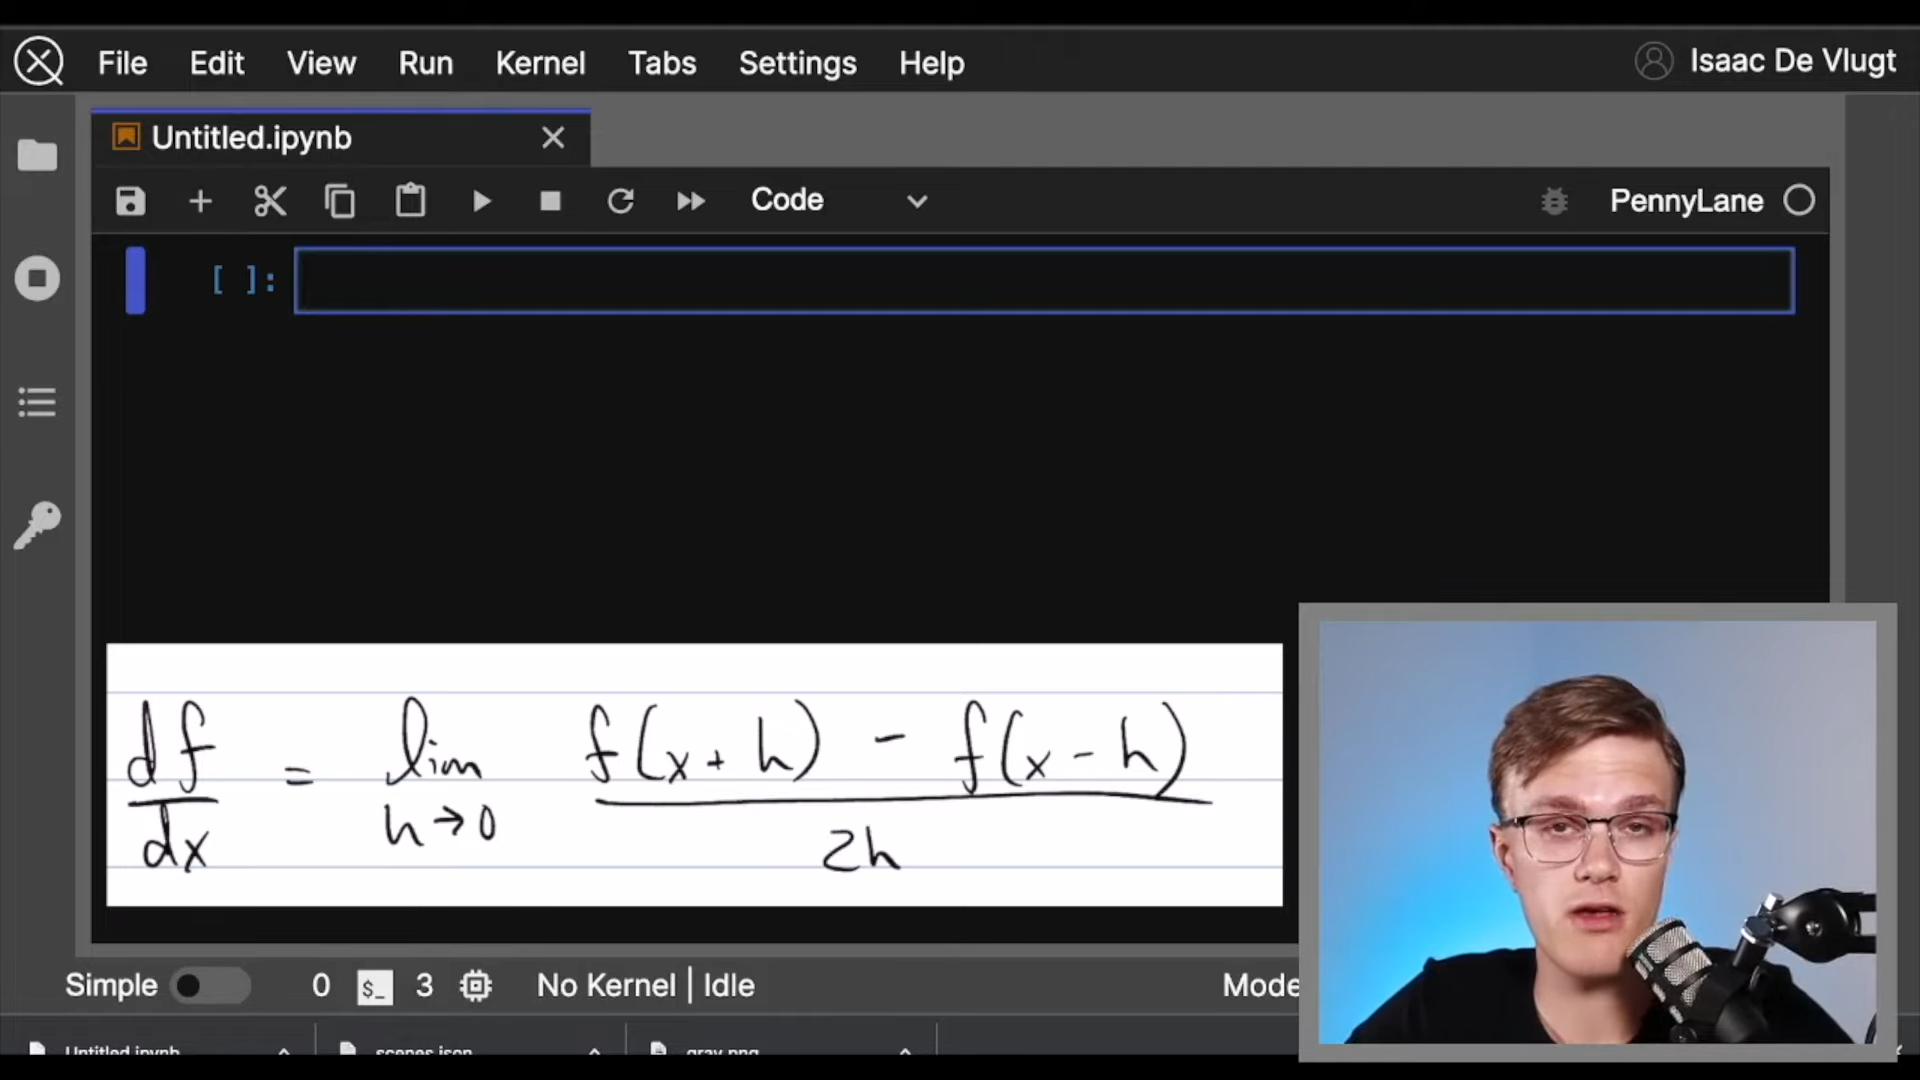

In [8]:
def my_finite_diff_grad(function, params, h=1.0e-8):
    gradient = np.zeros_like(params)
    for i in range(len(params)):
        params[i] += h
        gradient[i] += function(params)
        
        params[i] -= 2*h
        gradient[i] -= function(params)
        
        gradient /= 2*h
        
        params[i] += h
        
        return gradient

In [21]:
@qml.qnode(dev, diff_method="finite-diff")
def circuit_finite_diff(params):
    qml.RY(params[0], wires=0)
    qml.RX(params[1], wires=1)
    return qml.expval(qml.PauliZ(wires=0) + qml.PauliZ(wires=1))

In [17]:
parameters = np.array([np.pi/3, np.pi/4], requires_grad=True)

In [18]:
parameters

tensor([1.04719755, 0.78539816], requires_grad=True)

In [30]:
print(my_finite_diff_grad(function=circuit, params=parameters))

[-0.86602542  0.        ]


In [25]:
print(qml.grad(circuit_finite_diff)(parameters))

[-0.86602543 -0.70710681]
